### Multilayer Perceptron

So I recently upgraded my desktop and now that I have a gtx 1070 card, I really wanted to get my hands on deep learning using my gpu. The library that I have decided to go with is Tensorflow. Tensorflow is a graph computation/deep learning library developed by Google. Tensorflow also has support for running on the gpu so that we can train larger and faster networks. This notebook will run through will include building a multilayer perceptron model on the classic MNIST dataset. 

The MNIST dataset includes samples of handwritten digits from 1 - 10. The objective is to train our network so that it can determine the digit in a given image. 

In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Some examples of what each image looks like in the MNIST dataset:

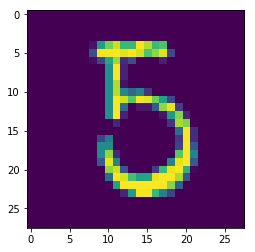

In [83]:
plt.imshow(mnist.train.images[3].reshape((28,28)))

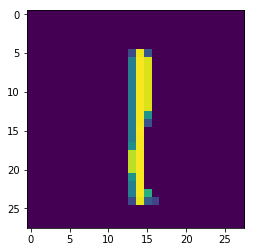

In [85]:
plt.imshow(mnist.train.images[0].reshape((28,28)))

A multilayer perceptron model consists of an input layer, a hidden layer (or multiple hidden layers), and an output layer. 

<img src = "https://upload.wikimedia.org/wikipedia/commons/c/c2/MultiLayerNeuralNetworkBigger_english.png" style = "width: 550px" />

Our model will contain 3 hidden layers with the rectified linear unit (ReLU) function as our activation function. The ReLU function is defined as:
$$
f(x) = 
\begin{cases} 
      1 & x > 0 \\
      0 & otherwise
   \end{cases}
$$

In [76]:
n = 28 * 28
num_classes = 10
x = tf.placeholder("float", [None, n])
y = tf.placeholder("float", [None, num_classes])

Define model:

In [77]:
def mlp(x, weights, bias):
    # Hidden Layer 1
    layer1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer1 = tf.nn.relu(layer1)
    
    # Hidden Layer 2 
    layer2 = tf.add(tf.matmul(layer1, weights['h2']), biases['b2'])
    layer2 = tf.nn.relu(layer2)
    
    # Hidden Layer 3 
    layer3 = tf.add(tf.matmul(layer2, weights['h3']), biases['b3'])
    layer3 = tf.nn.relu(layer3)
    
    # Output Layer 
    output_layer = tf.matmul(layer3, weights['out']) + biases['out']
    
    return output_layer
    

Define our weights and biases:

In [90]:
# Define weights and biases
n_hidden1 = 256
n_hidden2 = 256
n_hidden3 = 256

weights = {
    'h1': tf.Variable(tf.random_normal([n, n_hidden1])), 
    'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
    'h3': tf.Variable(tf.random_normal([n_hidden2, n_hidden3])),
    'out': tf.Variable(tf.random_normal([n_hidden3, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden1])), 
    'b2': tf.Variable(tf.random_normal([n_hidden2])), 
    'b3': tf.Variable(tf.random_normal([n_hidden3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [97]:
batch_size = 256
training_epochs = 50
predictions = mlp(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = predictions, labels = y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(cost)

We will use the stochastic gradient optimization algorithm to optimize our weights and biases with batch size 100. The stochastic gradient descent will randomly sample 100 of the images in our training set and train our model using 50 epochs to update our weights (1 pass forward in the network, and 1 pass backwards using backpropagation). The data has already been split into a training and testing set as part of a built in feature in Tensorflow. We just need to train our model and determine its accuracy by comparing it to the test set. 

In [101]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            
            batch_x, batch_y = mnist.train.next_batch(batch_size)
                        
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            
            avg_cost += c / total_batch

        print ("Epoch:", '%0d' % (epoch+1), "cost=", "{:.3f}".format(avg_cost))

    
    pred = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(pred, "float"))
    print ("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}) * 100)

Epoch: 1 cost= 936.272
Epoch: 2 cost= 216.633
Epoch: 3 cost= 146.919
Epoch: 4 cost= 103.030
Epoch: 5 cost= 82.060
Epoch: 6 cost= 66.410
Epoch: 7 cost= 58.126
Epoch: 8 cost= 47.596
Epoch: 9 cost= 41.920
Epoch: 10 cost= 35.643
Epoch: 11 cost= 31.135
Epoch: 12 cost= 27.851
Epoch: 13 cost= 25.317
Epoch: 14 cost= 21.935
Epoch: 15 cost= 20.035
Epoch: 16 cost= 18.263
Epoch: 17 cost= 16.363
Epoch: 18 cost= 14.673
Epoch: 19 cost= 12.848
Epoch: 20 cost= 11.297
Epoch: 21 cost= 11.236
Epoch: 22 cost= 9.495
Epoch: 23 cost= 9.143
Epoch: 24 cost= 8.317
Epoch: 25 cost= 7.601
Epoch: 26 cost= 6.615
Epoch: 27 cost= 6.030
Epoch: 28 cost= 5.580
Epoch: 29 cost= 5.029
Epoch: 30 cost= 4.679
Epoch: 31 cost= 4.614
Epoch: 32 cost= 3.817
Epoch: 33 cost= 3.542
Epoch: 34 cost= 2.902
Epoch: 35 cost= 3.418
Epoch: 36 cost= 2.386
Epoch: 37 cost= 2.389
Epoch: 38 cost= 2.204
Epoch: 39 cost= 2.047
Epoch: 40 cost= 2.045
Epoch: 41 cost= 1.595
Epoch: 42 cost= 1.463
Epoch: 43 cost= 1.447
Epoch: 44 cost= 0.991
Epoch: 45 cost= 

With 50 epochs, a 3 hidden layer multilayer perceptron optimized with stochastic gradient descent, we achieve a 91% accuracy. This accuracy is actually not that great compared to what other models can do. One way to improve on this model is introduce convolution and pooling layers, more commonly known as a convolutional neural network, which is what I will be working on next to get a better accuracy.